In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

### I. Exploration

Clean the training data and test data separately.

In [3]:
print('Train data shape: ', train.shape)
train.head()

('Train data shape: ', (891, 12))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Test data shape: ', test.shape)

('Test data shape: ', (418, 11))


In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


<b>Missing data from Training and Test</b>

In [7]:
# Get missing data info for each feature
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

pd.concat([train_missing, test_missing], axis=1, keys=['Training', 'Test']).sort_values(by='Training', ascending=False)

,Training,Test
Cabin,687,327.0
Age,177,86.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


<h4>Estimating the missing Age data</h4>

In [8]:
all_data = pd.concat([train, test], axis=0, ignore_index=True).sort_values(by='PassengerId')
pd.concat([all_data['Name'], all_data['Age']], axis=1).head(7)

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0


In [9]:
all_data['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.')
orig_titles = all_data['Title'].unique()
orig_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [10]:
new_titles = ['Mr', 'Mrs', 'Ms', 'Child', 'Mr', 'Mr', 'Mr', 'Ms', 'Ms', 'Mr', 'Ms', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs']
all_data['Title'].replace(orig_titles, new_titles, inplace=True)
pd.concat([all_data['Name'], all_data['Age'], all_data['Title']], axis=1).head(7)

,Name,Age,Title
0,"Braund, Mr. Owen Harris",22.0,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs
2,"Heikkinen, Miss. Laina",26.0,Ms
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs
4,"Allen, Mr. William Henry",35.0,Mr
5,"Moran, Mr. James",NaN,Mr
6,"McCarthy, Mr. Timothy J",54.0,Mr


In [11]:
age_means = all_data.groupby('Title')['Age'].mean().sort_values()
age_means

Title
Child     5.482642
Ms       21.937042
Mr       32.811056
Mrs      36.833333
Name: Age, dtype: float64

In [12]:
all_data.loc[(all_data['Age'].isnull()) & (all_data['Title']=='Child'), 'Age'] = round(age_means['Child'], 2)
all_data.loc[(all_data['Age'].isnull()) & (all_data['Title']=='Ms'), 'Age'] = round(age_means['Ms'], 2)
all_data.loc[(all_data['Age'].isnull()) & (all_data['Title']=='Mr'), 'Age'] = round(age_means['Mr'], 2)
all_data.loc[(all_data['Age'].isnull()) & (all_data['Title']=='Mrs'), 'Age'] = round(age_means['Mrs'], 2)
pd.concat([all_data['Name'], all_data['Age'], all_data['Title']], axis=1).head(7)

,Name,Age,Title
0,"Braund, Mr. Owen Harris",22.00,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,Mrs
2,"Heikkinen, Miss. Laina",26.00,Ms
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,Mrs
4,"Allen, Mr. William Henry",35.00,Mr
5,"Moran, Mr. James",32.81,Mr
6,"McCarthy, Mr. Timothy J",54.00,Mr


In [13]:
# Split the data back to train and test
# train = all_data[:891]
# test = all_data[891:]

### II. Correlation

In [14]:
# train.columns

In [15]:
survivors = train['Survived']
all_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True)

<b>Categorical Data</b>

In [16]:
pd.crosstab([all_data['Pclass']], all_data['Survived']).style.background_gradient(cmap='YlGnBu')

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
pd.crosstab([all_data['Sex']], all_data['Survived']).style.background_gradient(cmap='YlGnBu')

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


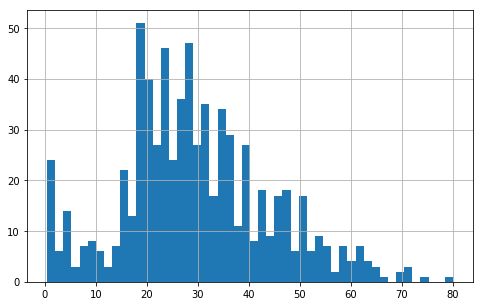

In [18]:
train['Age'].hist(bins=50, figsize=(8,5))

In [19]:
all_data['Age_Group'] = 0
all_data.loc[(all_data['Age'] > 10) & (all_data['Age'] <= 20), 'Age_Group'] = 1
all_data.loc[(all_data['Age'] > 20) & (all_data['Age'] <= 30), 'Age_Group'] = 2
all_data.loc[(all_data['Age'] > 30) & (all_data['Age'] <= 40), 'Age_Group'] = 3
all_data.loc[(all_data['Age'] > 40) & (all_data['Age'] <= 50), 'Age_Group'] = 4
all_data.loc[(all_data['Age'] > 50) & (all_data['Age'] <= 60), 'Age_Group'] = 5
all_data.loc[(all_data['Age'] > 60), 'Age_Group'] = 6
# all_data.drop(['Age'], axis=1, inplace=True)
pd.crosstab([all_data['Age_Group']], [all_data['Pclass'], all_data['Survived']]).style.background_gradient(cmap='YlGnBu')

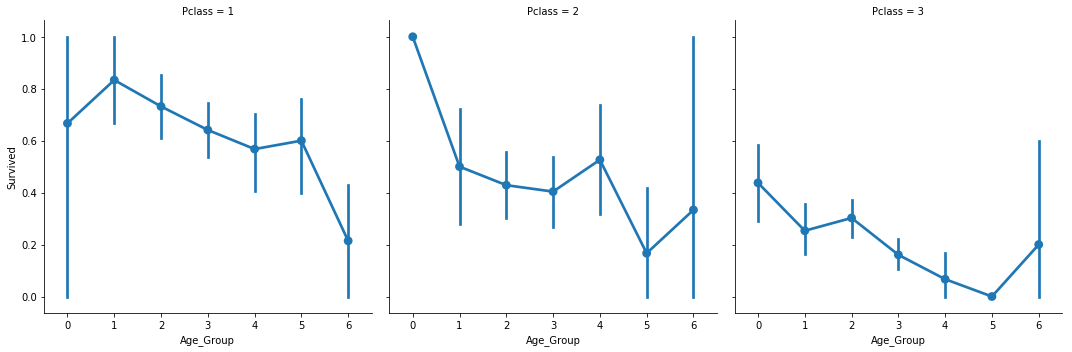

In [20]:
sns.factorplot('Age_Group', 'Survived', data=all_data, col='Pclass')

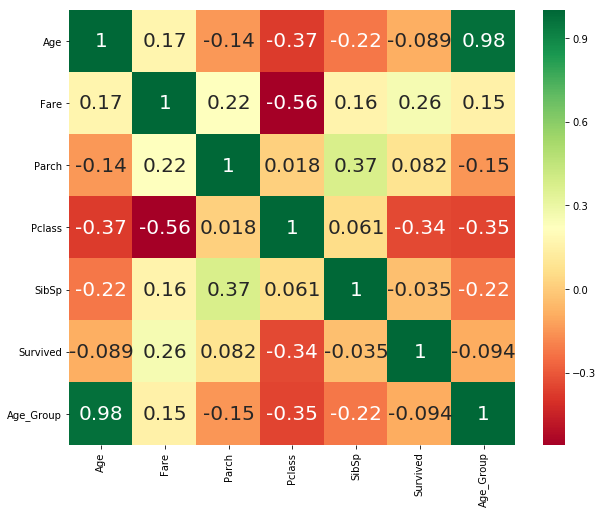

In [21]:
sns.heatmap(all_data.corr(), annot=True, cmap='RdYlGn', annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [22]:
all_data.columns

Index([u'Age', u'Embarked', u'Fare', u'Parch', u'Pclass', u'Sex', u'SibSp',
       u'Survived', u'Age_Group'],
      dtype='object')

In [24]:
train = all_data[:891]
test = all_data[891:]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [28]:
t_train, t_test = train_test_split(train, test_size=0.3, stratify=train['Survived'])
